<a href="https://colab.research.google.com/github/fagonzalezo/sklearn-kdcrf/blob/master/examples/approximation_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup code

In [3]:
# Install kdrcf if running in Google Colab

try:
  import google.colab
  IN_COLAB = True
  
except:
  IN_COLAB = False

if IN_COLAB:
    
    !git clone https://github.com/fagonzalezo/sklearn-kdcrf.git
    !mv sklearn-kdcrf/kdcrf .
    

In [4]:
%matplotlib inline
import pylab as pl
import numpy as np
import pandas as pd


In [5]:
##exact kernel
from sklearn.metrics.pairwise import pairwise_kernels

In [5]:
##approximate kernel RFF
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

from kdcrf import RBFSamplerORF
from kdcrf import RBFSamplerSORF
import time
import gc

import warnings
import numpy as np
from kdcrf import KDClassifierRF
from kdcrf import RBFSamplerORF
from kdcrf import RBFSamplerSORF

import time

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, pipeline
from sklearn.kernel_approximation import (RBFSampler,
                                          Nystroem)

In [6]:
def classify(data_train, targets_train, data_test, targets_test, gammas):
    
    scores = {}
    
    classifiers = {'svm':('gamma', svm.SVC()), 
                   'kdc exact':('gamma', KDClassifierRF(approx='exact')),
                   'lrff+ 2000':('gamma', KDClassifierRF(approx='lrff+', 
                                                        n_components=2000,
                                                        random_state=1)),            
                   'dmrff 2000':('gamma', KDClassifierRF(approx='dmrff', 
                                                        n_components=2000,
                                                        random_state=1)),            
                   'dmorf 2000':('gamma', KDClassifierRF(approx='dmrff', 
                                                        n_components=2000,
                                                        random_state=1, 
                                                        sampler=RBFSamplerORF(n_components=2000, random_state=1))),            
                   'lrff+ orf 2000':('gamma', KDClassifierRF(approx='lrff+', 
                                                        n_components=2000,
                                                        random_state=1, 
                                                        sampler=RBFSamplerORF(n_components=2000, random_state=1))),
    
    }
    
    for clfn in classifiers.keys():
        scores[clfn] = []
    
    for gamma in gammas:
        print('gamma:', gamma,' ',end='')
        for clfn, (gname, clf) in classifiers.items():
            print('clfn:', clfn)
            clf.set_params(**{gname:gamma})
            clf.fit(data_train, targets_train)
            scores[clfn].append(clf.score(data_test, targets_test))
            
    return classifiers, scores

## Kernel Density Classification  for letters

In [ ]:
## https://archive.ics.uci.edu/ml/datasets/Letter+Recognition
!pip install wget
import wget
letter = wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data")

In [13]:

letters = pd.read_csv("letter-recognition.data", header=None)
print(letters.head())
print(letters.describe())

vector = letters.values[:,1:]
labels = letters.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(vector, labels, test_size=0.3, random_state=42)

  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0  T   2   8   3   5   1   8  13   0   6   6  10   8   0   8   0   8
1  I   5  12   3   7   2  10   5   5   4  13   3   9   2   8   4  10
2  D   4  11   6   8   6  10   6   2   6  10   3   7   3   7   3   9
3  N   7  11   6   6   3   5   9   4   6   4   4  10   6  10   2   8
4  G   2   1   3   1   1   8   6   6   6   6   5   9   1   7   5  10
                 1             2             3            4             5   \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6

0.0078125  0.015625  0.03125  0.0625  0.125  0.25  0.5  1  2  4  8  

c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return

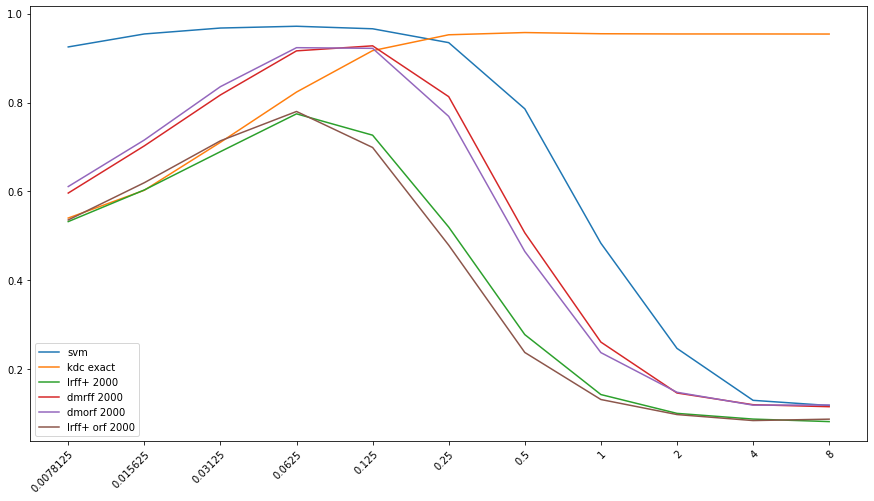

In [14]:
gammas = [2**i for i in range(-7,4)]
classifiers, scores = classify(X_train, y_train, X_test, y_test, gammas)
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()



In [15]:
import h5py
with h5py.File("usps.h5", 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]

In [ ]:
X_tr

0.0078125  0.015625  0.03125  0.0625  0.125  0.25  0.5  1  2  4  8  

c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return

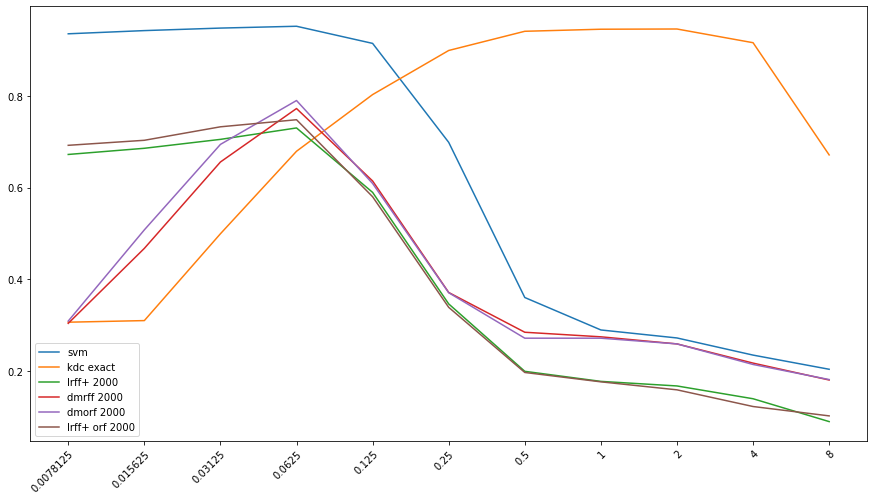

In [16]:
gammas = [2**i for i in range(-7,4)]
classifiers, scores = classify(X_tr, y_tr, X_te, y_te, gammas)
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()



In [17]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm


# The digits dataset
digits = datasets.load_digits(n_class=9)

n_samples = len(digits.data)
data = digits.data / 16.
data -= data.mean(axis=0)

# We learn the digits on the first half of the digits
data_train, targets_train = (data[:n_samples // 2],
                             digits.target[:n_samples // 2])


# Now predict the value of the digit on the second half:
data_test, targets_test = (data[n_samples // 2:],
                           digits.target[n_samples // 2:])

0.0078125  0.015625  0.03125  0.0625  0.125  0.25  0.5  1  2  4  8  

c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return

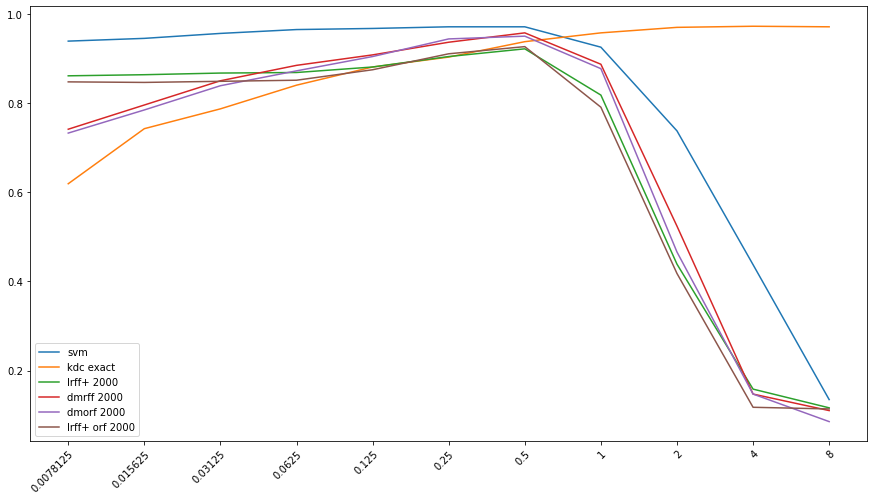

In [18]:
gammas = [2**i for i in range(-7,4)]
classifiers, scores = classify(data_train, targets_train, data_test, targets_test, gammas)
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()


## Moon Database

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.2, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
#y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)

0.0078125  0.015625  0.03125  0.0625  0.125  0.25  0.5  1  2  4  8  

c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return

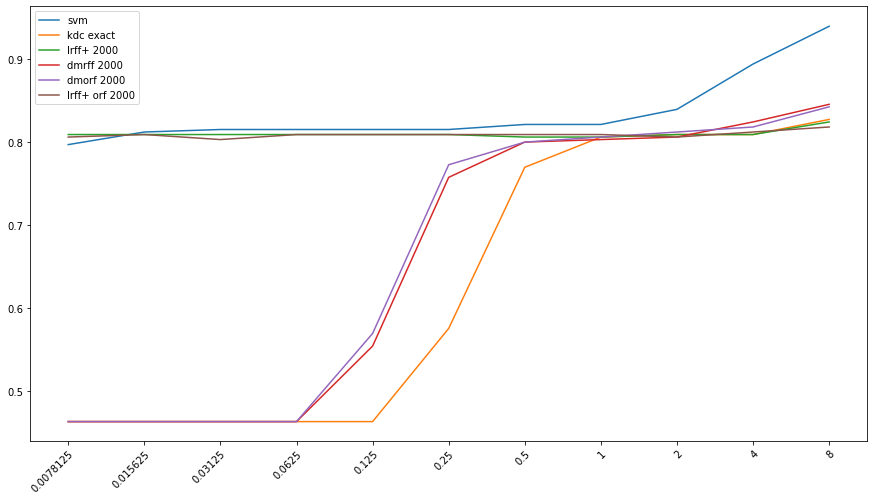

In [21]:

gammas = [2**i for i in range(-7,4)]
classifiers, scores = classify(X_train, y_train, X_test, y_test, gammas)
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()


## Forest database

In [ ]:
!pip install wget
import wget
forest = wget.download("http://archive.ics.uci.edu/ml//machine-learning-databases/covtype/covtype.data.gz")

In [34]:
import gzip

dataset = pd.read_csv('covtype.data.gz', nrows=100, compression='gzip',
                   error_bad_lines=False)

dataset = dataset.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
        dataset[:,:-1], dataset[:, -1], test_size=0.33, random_state=42)

0.0078125  0.015625  0.03125  0.0625  0.125  0.25  0.5  1  2  4  8  

c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Proyectos\sklearn-kdcrf\kdcrf\_kdclassifier.py:215: RuntimeWarning: invalid value encountered in true_divide
  probs = sums / np.sum(sums, axis=1)[:, np.newaxis]
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:2

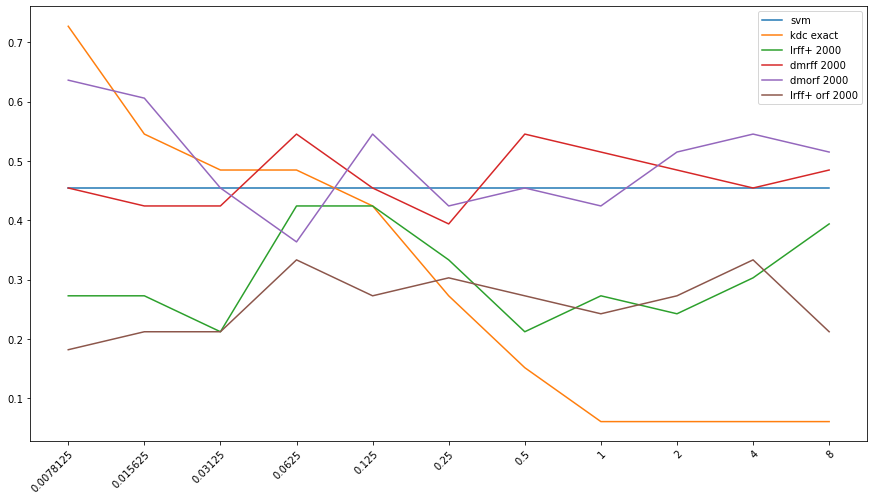

In [35]:

gammas = [2**i for i in range(-7,4)]
classifiers, scores = classify(X_train, y_train, X_test, y_test, gammas)
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()

## Cifar database


In [7]:
from examples.load_cifar_10 import cifar10

train_images, train_labels, test_images, test_labels = cifar10(is_one_hot=False)

In [8]:
train_images = train_images[:10000,:]
train_labels = train_labels[:10000]
test_images = test_images[:10000,:]
test_labels = test_labels[:10000]

0.0078125  0.015625  0.03125  0.0625  0.125  0.25  0.5  1  2  4  8  

c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\proyectos\sklearn-kdcrf\venv\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return

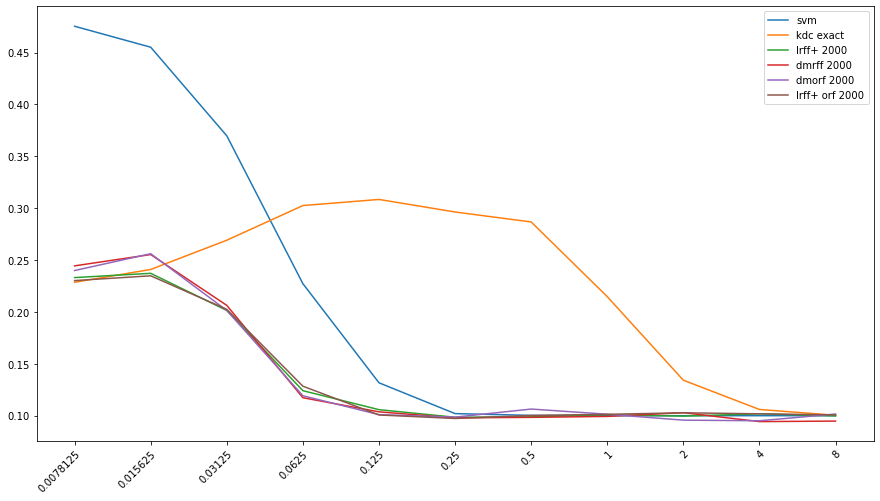

In [9]:
gammas = [2**i for i in range(-7,4)]
classifiers, scores = classify(train_images, train_labels, test_images, test_labels, gammas)
pl.rcParams["figure.figsize"] = (15,8)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()



## MNIST

In [ ]:
from requests import get

def download_file(url, file_name):
    with open(file_name, "wb") as file:
        response = get(url)
        file.write(response.content)
        

In [ ]:
download_file('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')

In [ ]:
def read_mnist(images_path: str, labels_path: str):
    with gzip.open(labels_path, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path,'rb') as imagesFile:
        length = len(labels)
        # Load flat 28x28 px images (784 px), and convert them to 28x28 px
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784) \
                        .reshape(length, 28, 28, 1)
        
    return features, labels

train = {}

train['features'], train['labels'] = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')


##Gisette

In [ ]:

wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/gisette/GISETTE/gisette_train.data")

In [ ]:

gisette = pd.read_csv("gisette_train.data", header=None)
print(letters.head())
print(letters.describe())

vector_letters = letters.values[:,1:]


In [ ]:
mse, classifiers, ratio_d = calculate_mean_square_error(vector_letters)

for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(ratio_d)), mse[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(ratio_d)))
pl.axes().set_xticklabels(ratio_d)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()